**Обработка изображений** Лабораторная работа №1 (Виничук Тимофей)

In [1]:
import cv2
import math
from IPython.display import Image
import warnings

warnings. filterwarnings('ignore')

In [2]:
def MSE_check(original, copy):
    MSE = 0
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
           
            MSE += ((original[y, x, 0] - copy[y, x, 0])**2 +
                    (original[y, x, 1] - copy[y, x, 1])**2 +
                    (original[y, x, 2] - copy[y, x, 2])**2) / 3
    return MSE/(original.shape[0]*original.shape[1])

In [3]:
def UQI_check(original, copy):
    UQI, orig_av, copy_av, sx, sy, sxy  = 0, 0, 0, 0, 0, 0
    
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
                    orig_av += (original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3
                    copy_av += (copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3

    orig_av /= (original.shape[0] * original.shape[1])
    copy_av /= (original.shape[0] * original.shape[1])

    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            sx += ((original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3 - orig_av)**2
            sy += ((copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3 - copy_av)**2
            sxy+= ((original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3 - orig_av)*((copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3 - copy_av)

    sx /= (original.shape[0] * original.shape[1])
    sy /= (original.shape[0] * original.shape[1])
    sxy /= (original.shape[0] * original.shape[1])
    UQI = (4*sxy*orig_av*copy_av)/((sx+sy)*(orig_av*orig_av+copy_av*copy_av))
    return UQI

In [4]:
def BlockUQI_check(original, copy, h_block, w_block):
    UQIi, orig_av, copy_av, sx, sy, sxy  = 0, 0, 0, 0, 0, 0
    for h in range(h_block-1):
        for w in range(w_block-1):
            for x in range(int(original.shape[1]/w_block)*w, int(original.shape[1]/w_block)*(w+1)):
                for y in range(int(original.shape[0]/h_block)*h, int(original.shape[0]/h_block)*(h+1)):
                    orig_av += (original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3
                    copy_av += (copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3
            orig_av /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
            copy_av /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)

            for x in range(int(original.shape[1]/w_block)*w, int(original.shape[1]/w_block)*(w+1)):
                for y in range(int(original.shape[0]/h_block)*h, int(original.shape[0]/h_block)*(h+1)):
                    sx += ((original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3 - orig_av)**2
                    sy += ((copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3 - copy_av)**2
                    sxy+= ((original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3 - orig_av)*((copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3 - copy_av)

            sx /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
            sy /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
            sxy /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)

            UQIi += (4*sxy*orig_av*copy_av)/((sx+sy)*(orig_av*orig_av+copy_av*copy_av))
            
    for h in range(h_block-1):        
        for x in range(int(original.shape[1]/w_block)*(w_block-1), original.shape[1]):
            for y in range(int(original.shape[0]/h_block)*h, int(original.shape[0]/h_block)*(h+1)):
                orig_av += (original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3
                copy_av += (copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3
        orig_av /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
        copy_av /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
        
        for x in range(int(original.shape[1]/w_block)*(w_block-1), original.shape[1]):
            for y in range(int(original.shape[0]/h_block)*h, int(original.shape[0]/h_block)*(h+1)):
                sx += ((original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3 - orig_av)**2
                sy += ((copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3 - copy_av)**2
                sxy+= ((original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3 - orig_av)*((copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3 - copy_av)

        sx /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
        sy /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
        sxy /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)

        UQIi += (4*sxy*orig_av*copy_av)/((sx+sy)*(orig_av*orig_av+copy_av*copy_av))
        
        
    for w in range(w_block-1):        
        for x in range(int(original.shape[1]/w_block)*w, int(original.shape[1]/w_block)*(w+1)):
            for y in range(int(original.shape[0]/h_block)*(h_block-1), original.shape[0]):
                orig_av += (original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3
                copy_av += (copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3
        orig_av /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
        copy_av /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
        
        for x in range(int(original.shape[1]/w_block)*(w_block-1), original.shape[1]):
            for y in range(int(original.shape[0]/h_block)*(h_block-1), original.shape[0]):
                sx += ((original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3 - orig_av)**2
                sy += ((copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3 - copy_av)**2
                sxy+= ((original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3 - orig_av)*((copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3 - copy_av)

        sx /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
        sy /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
        sxy /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)

        UQIi += (4*sxy*orig_av*copy_av)/((sx+sy)*(orig_av*orig_av+copy_av*copy_av))
        
    
    for x in range(int(original.shape[1]/w_block)*(w_block-1), original.shape[1]):
        for y in range(int(original.shape[0]/h_block)*(h_block-1), original.shape[0]):
            orig_av += (original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3
            copy_av += (copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3
    orig_av /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
    copy_av /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
    
    for x in range(int(original.shape[1]/w_block)*(w_block-1), original.shape[1]):
        for y in range(int(original.shape[0]/h_block)*(h_block-1), original.shape[0]):
            sx += ((original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3 - orig_av)**2
            sy += ((copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3 - copy_av)**2
            sxy+= ((original[y, x, 0] + original[y, x, 1] + original[y, x, 2]) / 3 - orig_av)*((copy[y, x, 0] + copy[y, x, 1] + copy[y, x, 2]) / 3 - copy_av)

    sx /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
    sy /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)
    sxy /= int( original.shape[1]/w_block)* int(original.shape[0]/h_block)

    UQIi += (4*sxy*orig_av*copy_av)/((sx+sy)*(orig_av*orig_av+copy_av*copy_av))
    UQIi /= (w_block * h_block)

    return UQIi

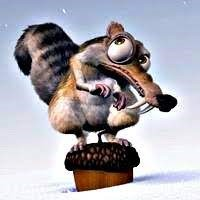

In [5]:
Image('original.jpg', width=200, height=200)

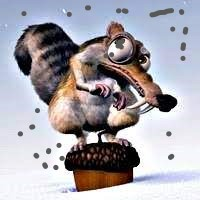

In [6]:
Image('copy.jpg', width=200, height=200)

In [7]:
original = cv2.imread('original.jpg')
copy = cv2.imread('copy.jpg')

print('MSE: ' + str(MSE_check(original, copy)))
print('MSE: ' + str(MSE_check(original, original)))
print('UQI: ' + str(UQI_check(original, copy)))
print('UQI: ' + str(UQI_check(original, original)))
print('BlockUQI: ' + str(BlockUQI_check(original, copy,10,10)))
print('BlockUQI: ' + str(BlockUQI_check(original, copy,50,50)))
print('BlockUQI: ' + str(BlockUQI_check(original, copy,60,60)))
print('BlockUQI: ' + str(BlockUQI_check(original, original,10,10)))

MSE: 4183.020300000008
MSE: 0.0
UQI: 0.9659225773956499
UQI: 1.0
BlockUQI: 0.8350577226825346
BlockUQI: 0.9216135761309074
BlockUQI: 0.9378151113810892
BlockUQI: 1.0
